## URL for Blog post: <a href="https://vrk6637.wixsite.com/website/post/cifar-10-image-classification"> Blog </a>

In [2]:
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context


In [3]:
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
import time 
from google.colab import files

In [4]:
train_dur = []
accu = []

In [33]:
def load_dataset():
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

def prep_pixels(train, test):
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	return train_norm, test_norm

def modelone():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
	print(model.summary())
    
	trainX, trainY, testX, testY = load_dataset()
	trainX, testX = prep_pixels(trainX, testX)
    
	start = time.time()
	model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=1)
	end = time.time()
    
	train_dur.append(end - start)
    
	model.save("modelone.h5")
	files.download("modelone.h5")
	acc = model.evaluate(testX, testY)
    
	accu.append(acc[1])
	return model

    
    
	return model

def modeltwo():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Dropout(0.5))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Dropout(0.5))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Dropout(0.5))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
	print(model.summary())
	trainX, trainY, testX, testY = load_dataset()
	trainX, testX = prep_pixels(trainX, testX)
    
	start = time.time()
	model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=1)
	end = time.time()
    
	train_dur.append(end - start)
	model.save("modeltwo.h5")
	files.download("modeltwo.h5")
	acc = model.evaluate(testX, testY)
    
	accu.append(acc[1])
	return model

def modelthree():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Dropout(0.2))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Dropout(0.3))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Dropout(0.4))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	print(model.summary())
    
	trainX, trainY, testX, testY = load_dataset()
	trainX, testX = prep_pixels(trainX, testX)
	start = time.time()
	model.fit(trainX, trainY, epochs=200, batch_size=64, verbose=1)
	end = time.time()
    
	train_dur.append(end - start)
    
	model.save("modelthree.h5")
	files.download("modelthree.h5")
	acc = model.evaluate(testX, testY)
	accu.append(acc[1])

	return model

modelone()
# modeltwo()
# modelthree()



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
______________________________

In [11]:
modeltwo()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)       

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

313/313 [==============================] - 3s 8ms/step - loss: 0.5959 - accuracy: 0.7979


In [20]:
accu

[0.47049999237060547,
 0.7279000282287598,
 0.7979000210762024,
 0.8166000247001648]

In [18]:
train_dur

[83.56456089019775, 1494.842612028122, 2003.7363409996033, 3323.5528275966644]

In [19]:
train_dur

[83.56456089019775, 1494.842612028122, 2003.7363409996033, 3323.5528275966644]

In [17]:
modelthree()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)       

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

313/313 [==============================] - 2s 7ms/step - loss: 0.7244 - accuracy: 0.8166


In [21]:
import seaborn as sns

In [25]:
acc = {}

acc["modelone"] = accu[1]
acc["modeltwo"] = accu[2]
acc["modelthree"] = accu[3]

acc

{'modelone': 0.7279000282287598,
 'modelthree': 0.8166000247001648,
 'modeltwo': 0.7979000210762024}

In [28]:
accy = [i*100 for i in accu]

Text(0, 0.5, 'Accuracy')

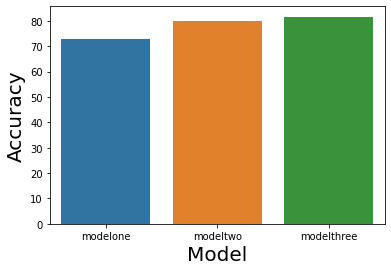

In [31]:
plt = sns.barplot(x=["modelone", "modeltwo", "modelthree"], y=accy[1:])

plt.set_xlabel("Model", fontsize = 20)
plt.set_ylabel("Accuracy", fontsize = 20)


Text(0, 0.5, 'Training Duration')

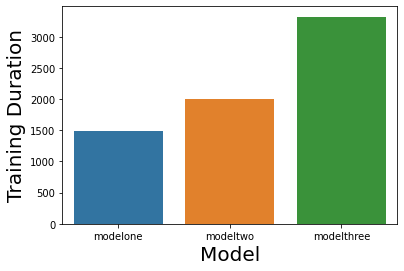

In [32]:
plt = sns.barplot(x=["modelone", "modeltwo", "modelthree"], y=train_dur[1:])

plt.set_xlabel("Model", fontsize = 20)
plt.set_ylabel("Training Duration", fontsize = 20)
